# concatenate clean parts

In [1]:
# Load once
import sys
import os
import mne
import numpy as np
# Add the workspace root to the Python path
mne.set_log_level('WARNING')  # Set MNE log level to WARNING to reduce output noise
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
import pickle
from config import young_adults_ids
ids = young_adults_ids
from Pipeline import concat_data
concat_data(ids,ica_name = 'ica_infomax', lowPassFilter_pregICA = 30, file_name = 'groupData_young')

c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\preprocessing_pipline\Pipeline.py:179: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\S303_ica_infomax.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica(ica_path)


KeyError: 'detection'

In [3]:
path_concat = os.path.join(workspace_root, 'Data', f'groupData4.fif')  
concat_data = mne.io.read_raw_fif(path_concat, preload=True) 
annotation = concat_data._annotations
df = annotation.to_data_frame()
df = df[df['duration'] != 0]
df= df.reset_index(drop=True)

C:\Users\gmoha\AppData\Local\Temp\ipykernel_17828\1972095491.py:2: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\groupData4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  concat_data = mne.io.read_raw_fif(path_concat, preload=True)


# gICA

In [1]:
import sys
import os
import mne
# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
path_concat = os.path.join(workspace_root, 'Data', f'groupData4.fif')  
concat_data = mne.io.read_raw_fif(path_concat, preload=True) 
def gICA(concat_data):
    # compute the ICA
    ica = mne.preprocessing.ICA(n_components = 0.98, method= 'infomax', fit_params=dict(extended=True))
    ica.fit(concat_data, picks = 'eeg', decim = 3)
    ICA_path = os.path.join(workspace_root, 'Data', f'gICA_4.fif')
    ica.save(ICA_path, overwrite=True)
    return 

# submit with submitit one job 
from submitit import AutoExecutor
executor = AutoExecutor(folder="logdir")
executor.update_parameters(cpus_per_task=4,  mem_gb=14, timeout_min=600)
job = executor.submit(gICA, concat_data)

Opening raw data file /workspaces/preprocessing_pipline/Data/groupData4.fif...


/tmp/ipykernel_5563/3994025178.py:9: RuntimeWarning: This filename (/workspaces/preprocessing_pipline/Data/groupData4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  concat_data = mne.io.read_raw_fif(path_concat, preload=True)


    Range : 2835 ... 1794939 =      5.537 ...  3505.740 secs
Ready.
Reading 0 ... 1792104  =      0.000 ...  3500.203 secs...


In [3]:
import sys
import os
import mne
# Add the workspace root to the Python path
mne.set_log_level('WARNING')
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
path_concat = os.path.join(workspace_root, 'Data', f'groupData4.fif')  
concat_data = mne.io.read_raw_fif(path_concat, preload=True)
ICA_path = os.path.join(workspace_root, 'Data', f'gICA_4.fif')
ica = mne.preprocessing.read_ica( ICA_path) 


C:\Users\gmoha\AppData\Local\Temp\ipykernel_14540\534549350.py:10: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\groupData4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  concat_data = mne.io.read_raw_fif(path_concat, preload=True)
C:\Users\gmoha\AppData\Local\Temp\ipykernel_14540\534549350.py:12: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\gICA_4.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica( ICA_path)


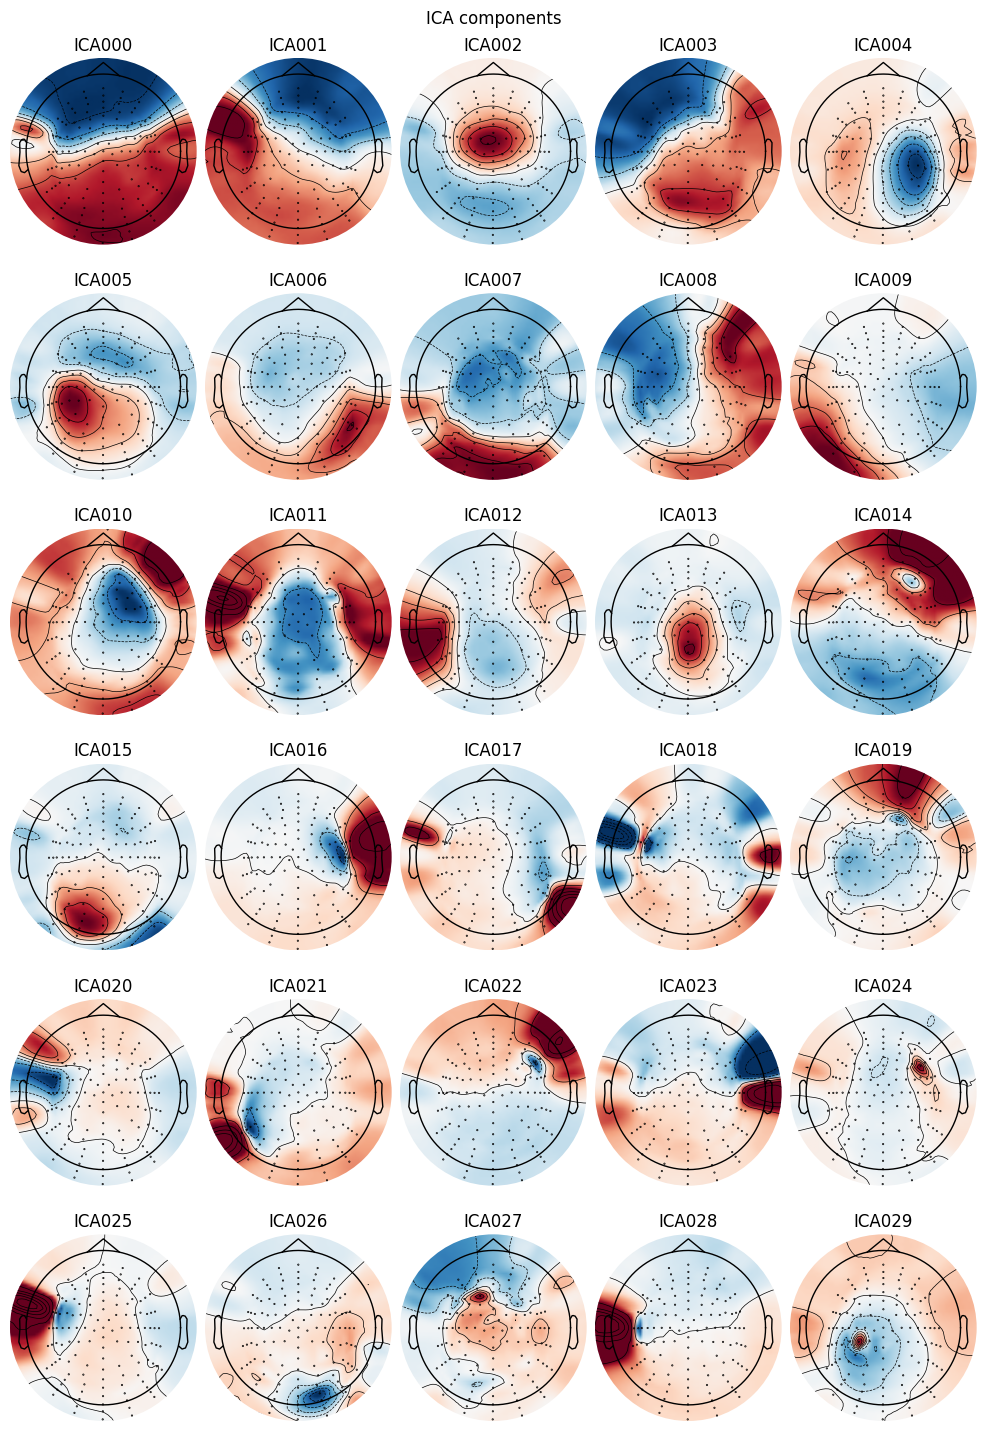

In [4]:
%matplotlib qt
ica.plot_components(inst = concat_data, picks = range(0, 30))